# Use of Machine Learning on Epileptic iEEG Data for Seizure Onset Predictions and Seizure State Classification


## Acknowledgements

I wish to thank my supervisor, Dr. Gerold Baier, for this incredible opportunity to undertake this project. Additionally, I would like to express my deepest gratitude for his continuous, invaluable support throughout the project; I would not have been able to complete the report without it.

## Declaration of Contribution

The majority of the code within this project was written by myself but did not go without contributions and optimisation by my supervisor. 

## Code Portfolio 

To promote sharing of knowledge in hopes of improved patient outcomes, this code is available online [here](https://github.com/sophiemcw/iEEG_predictions). 


# Contents

1. Abstract 
3. Introduction
    1. Epilepsy
    2. Electroencephalography (EEG) and Intracranial Electroencephalography (iEEG)
    3. iEEG Classification
    4. Machine Learning
    5. Hypothesis 
4. Code set up
    1. Module Import
    2. Functions
    3. Data Import
        1. Data Acquistition
        2. Seizure Onset and Offset Reference
    4. Data Preprocessing
        1. Filter Effect Visualisation
5. Patient iEEG
    1. Patient - Seizure 1
    2. Patient - Seizure 3
6. Methods Part 1 - Predicting Onset Time
    1. Data Preparation
    2. Stratified Shuffle Split
    3. Predicting iEEG Using Different Features
        1. Feature Importances
        2. Clinician Determined Important Features
        3. Classifier Predictions
    4. Predicting iEEG Using Different Data
        1. Training on Longer Data (seizure 3)
        2. Training on Different Data (seizure 1)
        3. Training on Pre- and Post-Ictal Data
        4. Classifier Predictions
    5. Effect of Filtering
    6. Comparison of Different CLassifiers
7. Methods Part 2 - Predicting Channel Onset 
    1. Data Preparation
        1. Transposed Graph Visualisation
        2. Downsampling
        3. Training Data Dictionaries
        4. Labelling Training Data
    2. Classifier Predictions
8. Results 
    1. Onset Time Predictions
        1. Comparison of Different Features
        2. Comparison of Different Training Data
        3. Effect of Filtering
        4. COmparison of Classifiers
    2. Channel Onset Predictions
        1. During Seizure 
        2. Prior to Seizure Onset
9. Discussion
    1. Limitations
    2. Further Investigations
    3. Concluding Statement
10. References

# Abstract

Epilepsy is one of the most common neurological disorders globally characterised by unprovoked, unpredictable, recurrent seizures. The debilitating consequences of this disease could be relieved with adequate seizure predictions. In this report, we demonstrate transition between non-seizure to seizure follows a gradual process that can be identified on iEEG by machine learning. Furthermore, the report provides evidence to support the hypothesis of seizure propensity states, which may be the result of microseizures. Patients fluctuate between these propensity states, and if high-seizure probability states were identified, it could provide an opportunity for therapeutic intervention. This was achieved through supervised machine learning techniques that identify deviations from normal activity towards more epileptic-like activity. 

# Introduction

## Epilepsy

Epilepsy is the most common neurological condition in children – affecting approximately 1 in 220 children in the UK (Epilepsy prevalence, incidence and other statistics Joint Epilepsy Council of the UK and Ireland, 2011). From the World Health Organisation, epilepsy affects 50 million people worldwide, but only up to 70% of individuals can become seizure free on antiepileptic drugs (WHO, 2019). Epilepsy is the condition defined by recurrent, unprovoked seizures; diagnosis of epilepsy requires two or more seizures (WHO, 2019).

A seizure is the transient disruption of brain activity and, consequently, brain function. It is the result of the abnormal, hypersynchronous firing of cortical neurons (Bromfield, Cavazos and Sirven, 2006). Clinical manifestations are diverse and are dependent on the area and extent of the cortex involved; they might involve physical convulsions, visual disturbances or altered consciousness levels. Seizures can result from any insults to the brain, including brain infections, genetic mutations or traumatic brain injury (WHO, 2019).
Classification of seizures uses the location of seizure onset and its propagation through the brain. Focal seizures denote abnormal brain activity is limited to a region of the brain in one brain hemisphere.

The pathophysiological hallmarks for an epileptic seizure are hyperexcitable and hypersynchronous neuronal activity (Bromfield, Cavazos and Sirven, 2006). Hyperexcitable and hypersynchronous meaning the heightened response of a neuron to stimulation and increased neuronal firing in close temporal and spatial proximity, respectively. Although exact mechanisms will vary between patients, generally there is a disruption of the balance between excitatory and inhibitory neural networks to result in seizure activity. This could be due to increased synaptic excitatory neurotransmission, decreased inhibitory neurotransmission or alterations of voltage-gated ion channels (Bromfield, Cavazos and Sirven, 2006). 

For a seizure to occur, this abnormal activity is thought to surpass a seizure threshold. The seizure threshold is regarded as a dynamic concept, which can be influenced by many factors such as the diurnal cycle for example (Engel et al., 2013). Antiepileptic medication, thereby, aim to raise this threshold.




## Electroencephalography (EEG) and Intracranial Electroencephalography (iEEG)

Electroencephalography (EEG) is the method of recording brain activity. It is a non-invasive technique using multiple electrodes placed on the scalp. These electrodes detect fluctuations in voltage produced from the summation of postsynaptic action potentials of relatively large groups of neurons firing synchronously (Louis and Frey, 2016). Recording the electrical activity over time allows evaluation of cerebral functioning, with many applications such as the diagnosis of epilepsy, monitoring of anaesthesia depth or neuroscience research (Louis and Frey, 2016).

Further exploration of brain activity uses intracranial electrodes that placed directly on the cortical area of investigation, a technique known as intracranial electroencephalography (iEEG). This technique is advantageous over EEG as it enables recordings in closer proximity to the neuronal activity, allowing greater spatial and temporal resolutions and signal-to-noise ratio since artefacts from muscle and movement are not present (Louis and Frey, 2016). It is, therefore, used in patients under consideration for resection surgery that requires more precise epileptic zone localisation. Limitations, however, include a limited field of view, sampling window, and interference from the procedure (Kuruvilla and Flink, 2003).

Figure 1 is an example of an iEEG. Voltage is plotted in the y-axis, and sample number (which can be interpreted as a function of time – time x sampling rate) is plotted in the x-axis. Each trace defines an electrode/ channel.

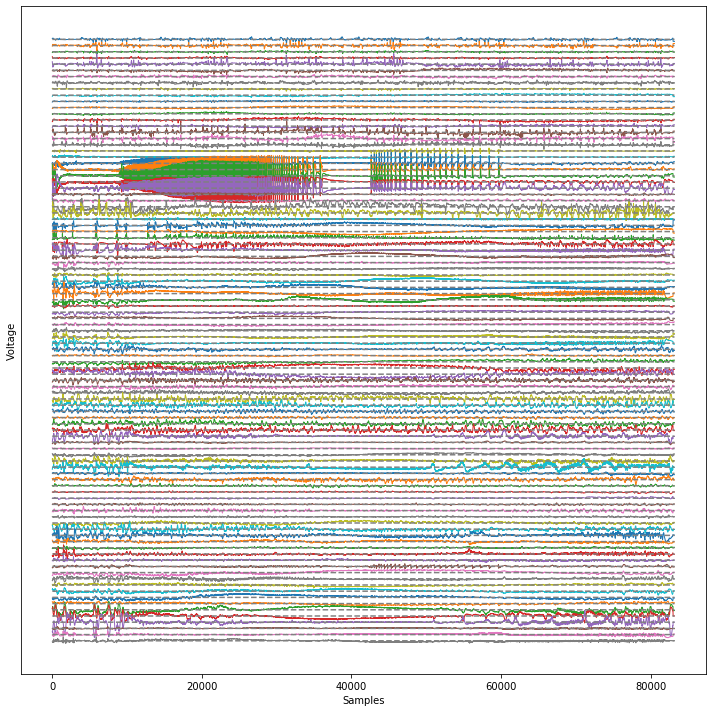

In [408]:
fig, ax = eeg_plot(P1, 600, normalise=False);

__Figure 1:__ Example iEEG

The order of sensors in this and other figures is as follows:

In [413]:
signal_labels = P1_edf.getSignalLabels()
print(signal_labels)

['EEG A9-A8', 'EEG A8-A7', 'EEG A7-A6', 'EEG A6-A5', 'EEG A5-A4', 'EEG A4-A3', 'EEG A3-A2', 'EEG A2-A1', 'EEG B12-B11', 'EEG B10-B9', 'EEG B9-B8', 'EEG B8-B7', 'EEG B7-B6', 'EEG B6-B5', 'EEG B5-B4', 'EEG B4-B3', 'EEG B3-B2', 'EEG B2-B1', 'EEG C12-C11', 'EEG C11-C10', 'EEG C10-C9', 'EEG C9-C8', 'EEG C8-C7', 'EEG C7-C6', 'EEG C6-C5', 'EEG C5-C4', 'EEG C4-C3', 'EEG C3-C2', 'EEG C2-C1', 'EEG E8-E7', 'EEG E7-E6', 'EEG E6-E5', 'EEG E5-E4', 'EEG E4-E3', 'EEG E3-E2', 'EEG E2-E1', 'EEG D8-D7', 'EEG D7-D6', 'EEG D6-D5', 'EEG D5-D4', 'EEG D4-D3', 'EEG D3-D2', 'EEG D2-D1', 'EEG F8-F7', 'EEG F7-F6', 'EEG F6-F5', 'EEG F5-F4', 'EEG F4-F3', 'EEG F3-F2', 'EEG F2-F1', 'EEG I13-I12', 'EEG I12-I11', 'EEG I11-I10', 'EEG I10-I9', 'EEG I9-I8', 'EEG J15-J14', 'EEG J14-J13', 'EEG J13-J12', 'EEG J12-J11', 'EEG J11-J10', 'EEG J10-J9', 'EEG J9-J8', 'EEG J3-J2', 'EEG J2-J1', 'EEG H8-H7', 'EEG H7-H6', 'EEG H6-H5', 'EEG H5-H4', 'EEG H4-H3', 'EEG H3-H2', 'EEG H2-H1', 'EEG L15-L14', 'EEG L14-L13', 'EEG L13-L12', 'EEG 

## iEEG Classification

EEG and iEEG recordings capture rhythmic and transient features. 

__Frequency__

The rhythmic activity refers to the dominating wave frequency in the recording. Complex waveforms can be interpreted as the summation of sinusoidal waves of a specific frequency, which can be categorised. One frequency band typically predominates in specific mental states (e.g. alert, wakefulness, drowsiness, sleep). Slower activity associated with decreased arousal (Louis and Frey, 2016).

Band Name | Frequency Range
----------|-----------
Broadband | 0.1-60Hz
Delta     |<4Hz
Theta     | 4-7Hz
Alpha     |8-12hz 
Beta      | 13-30Hz
Gamma     | 30-70Hz

__Table 1:__ Frequency classification, (Louis and Frey, 2016).

Frequencies above 100Hz, termed “ripples”, are thought to reflect epileptiform discharges (Louis and Frey, 2016).

__Transient features__

Transient features are events that superimpose the background activity. These include seizure activity as well as physiologically normal events, such as vertex waves (V-waves) that are found in EEGs during stages of sleep (Kumar and Bhuvaneswari, 2012)(Normal Sleep EEG: Overview, Stage I Sleep, Stage II Sleep, no date).

Epileptiform transients possess a diverse variety of waveforms, which can be further classified. Perucca et al. investigated iEEG seizure morphological patterns at seizure onset, identifying seven patterns: low-amplitude fast activity; low-frequency high-amplitude periodic spikes; sharp activity at >13Hz; spike-and-wave activity; burst of high-amplitude polyspikes; burst suppression; and delta brush. Figure 2 illustrates the locations of different pattern profiles found during one seizure. Table 2 is the corresponding descriptions.

![Seizure Pattern Profiles](figures/P2_labelled.png)

__Figure 2:__ Example seizure pattern profiles from P2 seizure data.

Colour Segment | Descriptions                                  |Frequencies
---------------|----------------------------------------------|--------
Purple         | low voltage fast activity                    | >13Hz
Red            | high amplitude fast activity                 | >13Hz
Orange         | low-frequency high amplitude periodic spikes | 0.5-2Hz


__Table 2:__ Descriptions of the seizure profile patterns seen in Figure 1.

The brain-wave activity of every individual is unique to that person, inclusive of epileptic activity. However, as discussed by Perucca et al. there are shared morphological patterns between epileptic disorders (Perucca, Dubeau and Gotman, 2014). 

Figure 1 and corresponding Table 2, however, shows the difficulty in creating a comprehensive seizure classification. 

Firstly, the orange segment could not be classified according to the seven seizure profiles in Perucca et al.’s scheme.

Furthermore, upon closer inspection, it is evident that multiple patterns are present within the iEEG data at one time. For example, within the “orange” and “green” segment of the data, there is the presence of low amplitude high-frequency activity. Patterns of activity are not uniform across the electrodes: something to be aware of when constructing the machine learning algorithms. 

## Machine Learning

Machine learning is a branch of artificial intelligence. Machine learning is a method of data analysis in which algorithms create statistical models to predict outcomes without explicit instruction (A Brief Introduction to Supervised Learning - Towards Data Science, 2019). For our task, machine learning is used to identify seizure-like activity.

Supervised machine learning is a type of learning algorithm. Supervised learning requires training: the user provides input data paired with the desired outputs (labels), from which the algorithm can fit a model that will reproduce the outputs. Conventionally, this is known as the training data. Once trained, unseen (unlabelled) data can be provided to the algorithm to create the outputs according to its model. Supervised machine learning is used in the project to classify data as seizure or non-seizure.

Conversely , in unsupervised learning the training data is withheld - this algorithm makes the model and the predictions using the input data alone. Instead of creating a model to correctly reproduce outputs, it draws trends from the data. Unsupervised learning can be used for clustering tasks.

All functionality is used from [scikit-learn](https://scikit-learn.org/stable/index.html), a comprehensive machine learning library platform for python (Scikit-learn: Machine Learning in Python, 2011).


## Hypothesis

As hypothesised by Bragin, 2000, epileptogenesis requires the development of a network of pathological, interconnected neuron clusters (Bragin, Wilson and Engel, 2000). Significantly, seizure-like electrophysiological changes may occur more frequently within these clusters, forming different seizure-onset probability states. A patient may drift between these states without consequence, this is until larger clusters of neurons enter ‘microseizure’ states, summating and then propagating to non-epileptic brain regions (Dichter, 2009). At this point, the seizure threshold is surpassed. The result: clinical seizure onset.

We hypothesise that transitions between inter- and ictal states are frequent and can be identified on iEEG data and therefore can be used to predict seizure onset. Furthermore, identification of these states can help predict seizure onset channels.


# Code set up

## Module import

In [1]:
import pyedflib
from matplotlib.pyplot import subplots
from numpy import zeros, arange, concatenate
import numpy as np
from scipy.signal import butter, sosfilt
import re
from numpy.random import uniform, seed, randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

# ----------

RANDOM_SEED = 123
seed(RANDOM_SEED)

Random seed is sets the random state used within the classifiers. It is provided to allow reproducibility of the code.

## Functions

What follows are custom made Python functions for data analysis.

In [407]:
def eeg_plot(data, offset, normalise=True, fig_name=False):
    """
    Plot date columns in EEG style
    data:      two-dimensional array
    offset:    scaling factor
    normalise: normalisation of amplitudes to variance 1
    """
    from matplotlib.pyplot import subplots, yticks, axis, legend
    
    start = 0
    samples = data.shape[0]
    electrodes = data.shape[1]

    dataset = data[start:start+samples, :electrodes]
    means = data[start:start+samples, :electrodes].mean(axis=0)
    devs = data[start:start+samples, :electrodes].std(axis=0)

    fig, ax = subplots(figsize=(10, 10))

    if not normalise:
        ax.plot((dataset - means)      + offset*arange(electrodes-1,-1,-1), linewidth=1);
    else:
        ax.plot((dataset - means)/devs + offset*arange(electrodes-1,-1,-1), linewidth=1);
    
    ax.plot(zeros((samples, electrodes)) + offset*arange(electrodes-1,-1,-1),'--',color='gray');
    ax.set(ylabel='Voltage', xlabel="Samples")

    yticks([]);
    
    names = [str(x) for x in range(1, electrodes + 1)]
    #legend(names)
    
    if fig_name != False:    
        fig_name = str(fig_name) + ".png"
        fig.savefig(f'figures/{fig_name}')
    
    fig.tight_layout()
    axis('tight');
    return fig, ax

In [70]:
def add_legend(fig):
    
    """
    Produces colourbar legend for prediction figures
    """
    fig.subplots_adjust(right=0.8)
    cbar_ax= fig.add_axes([0.85, 0.1, 0.02, 0.3])
    cbar_ax.set_title(label="Probability",pad=15, fontsize=13)
    cbar_ax.text(2.5,0.97, "Seizure")
    cbar_ax.text(2.5,-0.05,"Non-\nSeizure")
    im = ax[0].imshow(P2_REFERENCE[:,100000:200000], aspect="auto", cmap="bwr")
    fig.colorbar(im, cax=cbar_ax)

In [6]:
def find_start_stop(annotations_list):
    """
    Function returns times of onset and offset
    Requires the list of clinician annotations
    Looks for strings of "start", "onset", "seizure" and "end"
    
    """
    import re
    matches_start = []
    matches_end = []
    for index, entry in enumerate(annotations_list[2]):
        if re.search(r"\bstart\b|\bonset\b|seizure", entry, re.IGNORECASE):
            matches_start.append(annotations_list[0][index])
        elif re.search(r"\bend\b", entry, re.IGNORECASE):
            matches_end.append(annotations_list[0][index])
    return matches_start, matches_end

## Data Import

### Data Acquisition

Details omitted for data protect.

All patients were undergoing 24/7 presurgical monitoring for spontaneous, focal onset seizures under partial drug withdrawal. 

Two datasets were selected: seizure 1 and seizure 3, referred to as P1 and P2 throughout the report. These show a clear and sterotypic focal onset of the seizure. This onset is an example of the most frequently observed type, referred to as low-voltage high-frequency.

Recordings are electric potential readings from 98 invasive electrodes from both gray and white matter activity. Electrodes are sterotactic needles labelled alphabetically. On each electrode, contacts are approximately 1mm apart. 

Data is obtained at a sampling rate of 1024 per second, referred to as "sr" within the code, and are stored in European Data Format (EDF) including metainformations about labels and clinical annotations. The data used in the bipolar montage in the clinical EEG review.

The Python package 'pyedflib' was used to import the data for processing.


In [4]:
# P2_edf

P2_edf = pyedflib.EdfReader("Data/P2_long.EDF")
n = P2_edf.signals_in_file
signal_labels = P2_edf.getSignalLabels()
P2 = zeros((n, P2_edf.getNSamples()[0]))
for index in arange(n):
    P2[index, :] = P2_edf.readSignal(index)
P2 = P2.transpose()
print("Number of samples (time points):", P2.shape[0])
print("Number of features (channels:)", P2.shape[1])

(699136, 98)

In [5]:
# P1_edf

P1_edf = pyedflib.EdfReader("Data/Patient_Seizure1.EDF")
n = P1_edf.signals_in_file
signal_labels = P1_edf.getSignalLabels()
P1 = zeros((n, P1_edf.getNSamples()[0]))
for index in arange(n):
    P1[index, :] = P1_edf.readSignal(index)
P1 = P1.transpose()
print("Number of samples (time points):", P1.shape[0])
print("Number of features (channels:)", P1.shape[1])

(83200, 98)

### Seizure onset and offset reference

From the EDF file, metadata were extracted, including the time clinician commentary using `getAnnotations()` . From this, the best estimations of the start and end of the seizures can be calculated and used as references.

In [7]:
# variables
 
sr = P1_edf.getSampleFrequencies()[0]

# ------------

P1_START, P1_END= find_start_stop(P1_edf.readAnnotations())
P1_START = int(P1_START[0]*sr)
P1_END = int(P1_END[0]*sr)

# -----------

P2_START, P2_END = find_start_stop(P2_edf.readAnnotations())
P2_START = int(P2_START[0]*sr)
P2_END = int(P2_END[0]*sr)

print("P1:\nOnset found:", P1_START, "\nSeizure end found:", P1_END)
print("\nP2:\nOnset found:", P2_START, "\nSeizure end found:", P2_END)


Patient 1:
Onset found: 2836 
Seizure end found: 83564

Patient 2:
Onset found: 139149 
Seizure end found: 228452


In [8]:
# reference image

P1_REFERENCE = zeros(P1.shape[0])
P1_REFERENCE[P1_START: P1_END] = 1
P1_REFERENCE = P1_REFERENCE.reshape(1,-1)

P2_REFERENCE = zeros(P2.shape[0])
P2_REFERENCE[P2_START:P2_END] = 1
P2_REFERENCE = P2_REFERENCE.reshape(1,-1)

## Data Preprocessing

Preprocessing is regarded as necessary to filter out the noise and clinically irrelevant signals from our raw data for analysis. The main advantage of filtering is, therefore, making EEG signals easier to interpret. The range of frequencies preserved during filtration is referred to as the bandpass. Highpass filters, those that preserve high frequencies, eliminate drifting signals caused by low-frequency waves. Conversely, lowpass filters eliminate high-frequency waves, and in the case of EEG recordings, these might correlate to muscle movement artefacts. Table 1 shows the conventional filter nomenclature and frequency ranges. 


Band Name | Frequency Range 
----------|-----------------
Broadband | 0.1-70Hz         
Delta     | 0.1-3Hz           
Theta     | 4-7Hz           
Alpha     | 8-12hz           
Beta      | 13-30Hz         
Gamma     | 30-70Hz         

__Table 1:__ Frequency classification, (Louis and Frey, 2016).

The function `filter_data` allows the choice of a frequency band. The function uses a 5th order Butterworth filter with forward-backwards filtering to avoid distortions of the signal phase. Unless mentioned otherwise, the data was preprocessed using the broadband filter.

In [9]:
# dictionary
frequency_bands = {}
frequencies = ['broadband', 'delta', 'theta', 'alpha', 'beta', 'gamma']
bands = [[0.1, 70], [0.1, 3], [4, 7], [8, 12], [13, 30], [31, 70]]
for i in range(0, len(frequencies)):
    frequency_bands[frequencies[i]] = bands[i]
        
# function to filter data -------------------------

def filter_data(data, filter_frequency="broadband", order=5):
    
    """
    Filter function using Butterworth filtering
    Requires data to be filtered
    Unless specified otherwise, broadband filter will be applied
    **kwargs to specifiy desired frequency band
    
    
    Frequency Bands:
    Broadband – 0.1-70Hz
    Delta – <4Hz
    Theta – 4-7Hz
    Alpha – 8-12hz 
    Beta – 13-30Hz
    Gamma – 30-70Hz
    """
    
    low, high = frequency_bands[filter_frequency]
    order = order
    
    sos = butter(order, (low,high), btype='bandpass', fs=sr, output='sos')
        
    data_filtered = zeros([data.shape[0], data.shape[1]])
    
    for index, column in enumerate(data.transpose()): 
        forward = sosfilt(sos, column)
        backwards = sosfilt(sos, forward[-1::-1])
        data_filtered[:, index] = backwards[-1::-1]
        
    #print("Data: ", data_filtered.shape)
    return data_filtered

### Filter Effect Visualisation

Electrode order, from top to bottom: 
 ['EEG A9-A8', 'EEG A8-A7', 'EEG A7-A6', 'EEG A6-A5', 'EEG A5-A4', 'EEG A4-A3', 'EEG A3-A2', 'EEG A2-A1', 'EEG B12-B11', 'EEG B10-B9', 'EEG B9-B8', 'EEG B8-B7', 'EEG B7-B6', 'EEG B6-B5', 'EEG B5-B4', 'EEG B4-B3', 'EEG B3-B2', 'EEG B2-B1', 'EEG C12-C11', 'EEG C11-C10', 'EEG C10-C9', 'EEG C9-C8', 'EEG C8-C7', 'EEG C7-C6', 'EEG C6-C5', 'EEG C5-C4', 'EEG C4-C3', 'EEG C3-C2', 'EEG C2-C1', 'EEG E8-E7', 'EEG E7-E6', 'EEG E6-E5', 'EEG E5-E4', 'EEG E4-E3', 'EEG E3-E2', 'EEG E2-E1', 'EEG D8-D7', 'EEG D7-D6', 'EEG D6-D5', 'EEG D5-D4', 'EEG D4-D3', 'EEG D3-D2', 'EEG D2-D1', 'EEG F8-F7', 'EEG F7-F6', 'EEG F6-F5', 'EEG F5-F4', 'EEG F4-F3', 'EEG F3-F2', 'EEG F2-F1', 'EEG I13-I12', 'EEG I12-I11', 'EEG I11-I10', 'EEG I10-I9', 'EEG I9-I8', 'EEG J15-J14', 'EEG J14-J13', 'EEG J13-J12', 'EEG J12-J11', 'EEG J11-J10', 'EEG J10-J9', 'EEG J9-J8', 'EEG J3-J2', 'EEG J2-J1', 'EEG H8-H7', 'EEG H7-H6', 'EEG H6-H5', 'EEG H5-H4', 'EEG H4-H3', 'EEG H3-H2', 'EEG H2-H1', 'EEG L15-L1

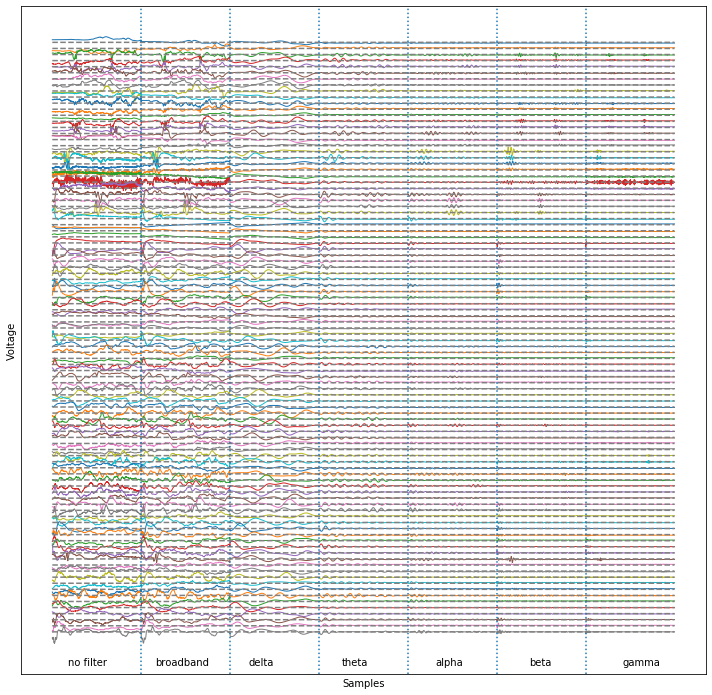

In [419]:
data = P1[P1_START:P1_START+2000]

segments = [data, ]

for freq in frequencies:
    segments.append(filter_data(data, freq))
segments = concatenate(segments, axis=0)

(fig, ax) = eeg_plot(segments, 4, normalise=True, fig_name="P1_Filtering_view")

for i, freq in enumerate(frequencies):
    ax.axvline((i+1)*2000, linestyle="dotted")
    fig.text(x=(0.22+i*.13), y=0.07, s=f"{freq}")
    ax.set_xticks([])
    
fig.text(0.1, 0.07, s="no filter");

print("Electrode order, from top to bottom: \n", signal_labels)

__Figure 3:__ The effect of filtering on the same segment of an EEG recording. 

# Patient iEEG

## Patient Seizure 1

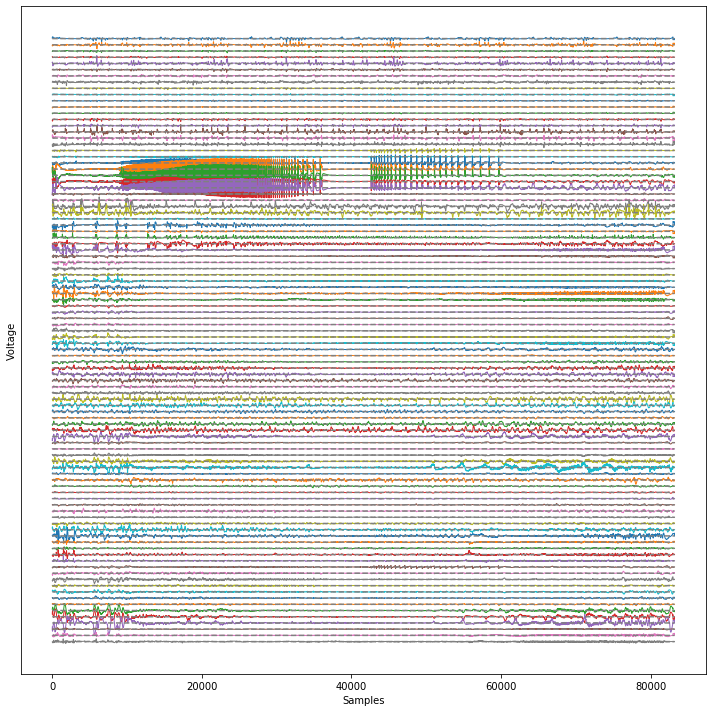

In [420]:
eeg_plot(filter_data(P1), 800, normalise=False, fig_name="P1");

__Figure 1 (repeat):__ P1 iEEG recording, shows the entire seizure duration.

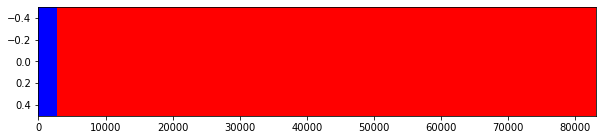

In [11]:
fig, ax = subplots(figsize=(10,2))
ax.imshow(P1_REFERENCE, aspect="auto", cmap="bwr");

__Figure 4:__ Corresponding states for P1. Blue represents non-seizure state and red represents the seizure state, determined from the EDF metadata.

## Patient Seizure 3 (long)

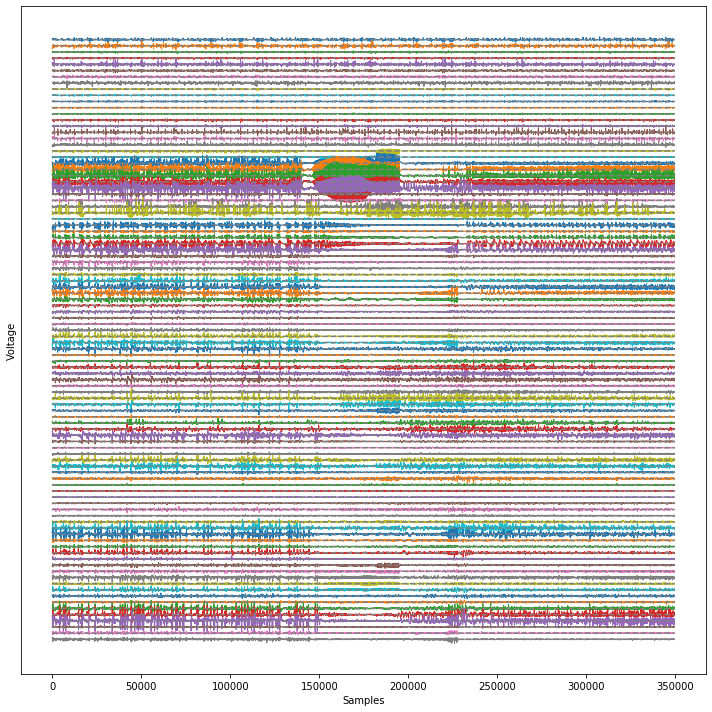

In [421]:
# first half of the data
eeg_plot(filter_data(P2[:P2.shape[0]//2, :]), 800, normalise=False, fig_name="P2_part1");

__Figure 5 & 6:__ P2 iEEG recording.

# Methods - Predicting Onset Time

## Data Preparation

Conventionally, training signals are symbolised as “X”  and corresponding labels with a “y”. 

Seizure and non-seizure segments are selected from the dataset for training, along with an additional segment to be used for testing. 


In [54]:
X_1 = filter_data(P2[:20000, :])
X_2 = filter_data(P2[180000:P2_END, :])
X = concatenate((X_1, X_2), axis=0)

# testing data
X_TEST = filter_data(P2[100000:200000])

# labels
y = zeros(X.shape[0])
y[X_1.shape[0]:] = 1

print("X:", X.shape, "\ny:", y.shape)

X: (68452, 98) 
y: (68452,)


## Stratified Shuffle Split

Stratified Shuffle Split is a strategy for cross-validating the model. Based on the strategy Shuffle Split, it randomly splits the data into training and testing data but preserves the ratio of seizure and non-seizure samples in each category. The user determines the number of splits and each split can be processed the classifier in order to produce a more robust model. The model learns from the outcome of each split. The score is the fraction of labels correctly assigned. This strategy is, therefore, useful in producing an accurate model but avoid issues of overfitting. If the score is significantly lower on the testing data, it shows the model is overfitting on the training data. Furthermore, a score of ~0.5 shows the model is no better than random chance at predicting if the data is interictal or ictal. 

In [52]:
def sss(X, y, classifier, n_splits=2, test_size=0.4):
    
    """
    Function allows training using Stratified Shuffle Split
    Requires training data and labels
    Classifier needs to be specified 
    Optionally can change number of splits and test/train size    
    
    """
    
    ss_split = StratifiedShuffleSplit(random_state=RANDOM_SEED, n_splits=n_splits, test_size=test_size)
    
    for train_index, test_index in ss_split.split(X, y):

        X_train, y_train = X[train_index, :], y[train_index]
        X_test,  y_test  = X[test_index, :],  y[test_index]

        classifier.fit(X_train, y_train)

In [55]:
# call classifier
clf = RandomForestClassifier(random_state=RANDOM_SEED)

# run stratified shuffle split
sss(X, y, clf)

# result store
predictions = clf.predict_proba(X_TEST)

## Predicting iEEG Using Different Features

### Feature Importances

`feature_importances_` obtains an instance that evaluates the contribution of a feature to the classification of the data. Exploring features could reveal features previously disregarded upon visual interpretation alone. Furthermore, we can infer that features with the highest contribution to classification show a polarising transition between seizure and non-seizure states. Clinically, it could be determined as an area with the most abnormal activity or an area most vulnerable to epileptic influences. 

In [423]:
classifier_features = clf.feature_importances_
labels = P2_edf.getSignalLabels()
labels = np.asarray(labels)
channels = np.arange(0, len(labels), step=1)

# taking only best channels-----------
classifier_seizure_features = channels[classifier_features >=0.01]

### Clinician Determined Seizure Features

From the EDF metadata, we can assume channels commented on by the clinician were determined as clinically significant. The practical relevance of this is that tissue surrounding seizure onset channels is considered for removal during neurosurgery.

These features can be compared to the classifier-determined features for interpretation.

In [437]:
# finding important channels

P1_labels = P1_edf.getSignalLabels()
annotation_leads = ["C", "D", "F", "H", "K", "E", "G", "L"]

clinician_leads = []

for i, val in enumerate(P1_labels):
    P1_labels[i]= val.strip("EEG")

import re
for i, entry in enumerate(P1_labels):
    for l in annotation_leads:
        if re.search(l, entry):
            clinician_leads.append(i)
print("clinician leads:\n", clinician_leads)
print("\nclassifier seizure leads:\n", classifier_seizure_features)

# overlap:

overlap = np.intersect1d(clinician_leads, classifier_seizure_features)
print("\noverlapping features:\n", overlap)
print("\nchannel labels of overlapping features:\n", np.asarray(signal_labels)[overlap])

clinician leads:
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]

classifier seizure leads:
 [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 48 58 59 60 61 62 63 72
 73 74]

overlapping features:
 [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 48 72 73 74]

channel labels of overlapping features:
 ['EEG E8-E7' 'EEG E7-E6' 'EEG E6-E5' 'EEG E5-E4' 'EEG E4-E3' 'EEG E3-E2'
 'EEG E2-E1' 'EEG D8-D7' 'EEG D7-D6' 'EEG D6-D5' 'EEG D5-D4' 'EEG D4-D3'
 'EEG D3-D2' 'EEG D2-D1' 'EEG F8-F7' 'EEG F7-F6' 'EEG F3-F2' 'EEG L14-L13'
 'EEG L13-L12' 'EEG L12-L11']


### Classifier Predictions 
The following code repeats seizure onset prediction, using new classifiers - this is because the number of features needs to be conserved between training and testing data.

The same training data is used, but only the features we want to compare are kept.

In [59]:
# calls new classifiers
clf_feature_importances = RandomForestClassifier(random_state=RANDOM_SEED)
clf_clinician_importances = RandomForestClassifier(random_state=RANDOM_SEED)

# from our previous training data, features are selected
X1 = X[:, classifier_important_features]
X2 = X[:, clinician_leads]

# stratified shuffle split
sss(X1, y, clf_feature_importances)
sss(X2, y, clf_clinician_importances)

# assignment of predictions to variables
predictions_classifier_importances = clf_feature_importances.predict_proba(X_TEST[:, classifier_important_features])
predictions_clinician_importances = clf_clinician_importances.predict_proba(X_TEST[:, clinician_leads])

## Predicting iEEG Using Different Data

### Training on longer data (seizure 3)

It is established that seizure activity has unique EEG patterns, some symptomatic of certain conditions, thereby, a classifier trained on diverse propagation patterns would have a greater ability to classify data.

In [60]:
X_1 = filter_data(P2[0:10000,:])
X_2 = filter_data(P2[P2_START:P2_END, :])

X1 = concatenate((X_1, X_2), axis=0)

y1 = zeros(X1.shape[0])
y1[X_1.shape[0]:] = 1

### Training on different seizure profile (seizure 1)

In [61]:
X_1 = filter_data(P2[0:10000,:])
X_2 = filter_data(P1[P1_START:,:])

X2 = concatenate((X_1, X_2), axis=0)

y2 = zeros(X2.shape[0])
y2[X_1.shape[0]:] = 1

### Training on pre- and post-ictal data

It is uncertain as to what seizure propensity state the patient is in the recordings and, consequently, we might incorrectly label a high seizure likelihood state as a baseline state. To select the best “non-seizure” training data, a reasonable temporal distance from onset should be used.

This code takes training data from the very start of the dataset and the very end. 

Training data selected after seizure onset may be more representative of a baseline state(low seizure propensity) as we are aware that the data prior to onset had already lead to a seizure.


In [62]:
X_1 = filter_data(P2[-20000:-10000,:])
X_2 = filter_data(P2[180000:P2_END, :])
                          
X3 = concatenate((X_1, X_2), axis=0)

y3 = zeros(X3.shape[0])
y3[X_1.shape[0]:] = 1

### Classifier Predicitons

In [63]:
clf_longer_data = RandomForestClassifier(random_state=RANDOM_SEED)
clf_different_data = RandomForestClassifier(random_state=RANDOM_SEED)
clf_post_ictal_data = RandomForestClassifier(random_state=RANDOM_SEED)

sss(X1, y1, clf_longer_data)
sss(X2, y2, clf_different_data)
sss(X3, y3, clf_post_ictal_data)

predictions_longer_data = clf_longer_data.predict_proba(X_TEST)
predictions_different_data = clf_different_data.predict_proba(X_TEST)
predictions_post_ictal_data = clf_post_ictal_data.predict_proba(X_TEST)

## The Effect of Filtering



In [25]:
"""
Frequency Bands:

Broadband – 0.1-70Hz
Delta – <4Hz
Theta – 4-7Hz
Alpha – 8-12hz 
Beta – 13-30Hz
Gamma – 30-70Hz
"""

test = P2[130000:150000,:]
filtered_data = []

for freq in frequencies:
    filtered_data.append(filter_data(test, freq))

In [336]:
X_1 = P2[:10000,:]
X_2 = P1[P1_START:,:]
X_testing = P2[100000:200000]

X = concatenate((X_1, X_2), axis=0)

y = zeros(X.shape[0])
y[X_1.shape[0]:] = 1

# without filtering--------

clf_without_filter = RandomForestClassifier(random_state=RANDOM_SEED)
clf_without_filter.fit(X,y)
predictions_without_filter = clf_without_filter.predict_proba(X_testing)

# filtering ------------

predictions_filtering = []

for freq in frequencies:
    clf_filtering = RandomForestClassifier(random_state=RANDOM_SEED)
    X_train = filter_data(X, freq)
    X_test = filter_data(X_testing, freq)
    clf_filtering.fit(X_train,y)
    predictions_filtering.append(clf_filtering.predict_proba(X_test))    


In [339]:
%store predictions_filtering 
# stores variables 

len(predictions_filtering)

Stored 'predictions_filtering' (list)


6

## Comparisons of Different Classifiers

There are many methods of supervised learning for data analysis. Some of the popular ones being Random Forest, K-nearest neighbours (KNN), Artificial Neural Networks (ANN) and Support Vector Machines (SVM). Different algorithms are more suited to different machine learning tasks. The implementation-specific details of each algorithm are beyond the scope of this paper; however, see [sci-kit learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) for more information.

In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_SEED)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_SEED),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_SEED)),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_SEED),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'KNN': KNeighborsClassifier(),
    'SVC (RBF)': SVC(random_state=RANDOM_SEED, probability=True),
    'SVC (Poly)': SVC(kernel='poly', degree=5, random_state=RANDOM_SEED, probability=True),
    'SVC (Sigmoid)': SVC(kernel='sigmoid', degree=5, random_state=RANDOM_SEED, probability=True),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_SEED)
}

In [28]:
# very long run time
X_1 = filter_data(P2[:20000,:])
X_2 = filter_data(P1[P1_START:P1_START+20000,:])

X = concatenate((X_1, X_2), axis=0)

y = zeros(X.shape[0])
y[X_1.shape[0]:] = 1

predictions_classifiers = []

for key, clf in classifiers.items():
    clf.fit(X,y)
    predictions_classifiers.append(clf.predict_proba(X_TEST))

In [321]:
%store predictions_classifiers # stores the list even if kernel is stopped
# %store -r predictions_classifiers # retrieval 
len(predictions_classifiers)

# Methods - Predicting Channel Onset

## Preparation

### Transposed Graph Visualisation

One flawing of our model is created from the inaccurate labelling of the training data. When we train the algorithm on the full length of the seizure, we are assuming all the channels (features) have onset at the same time. In reality, abnormal activity spreads from channels and some channels may not be recruited at all. By transposing the training data, the classification task becomes the identification of seizure channels, not seizure period.  Illustrating predictions of spread may be more clinically meaningful.

The figure produced by transposed data now illustrates the voltage distributions of the electrodes for a set period.  


[Text(0.5, 69.0, 'Channels')]

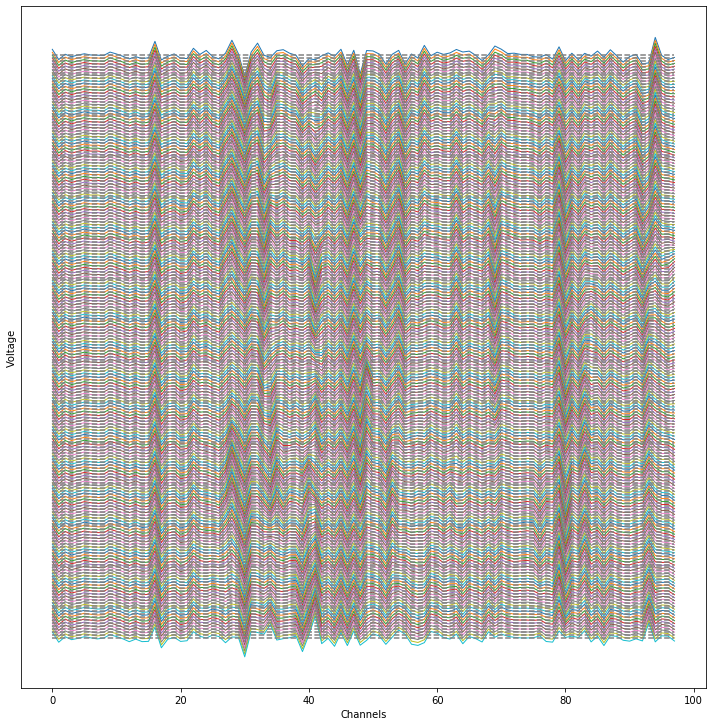

In [281]:
fig, ax = (eeg_plot(P1[P1_START-100:P1_START+100,:].T, 100, normalise=False, fig_name="P1_Transposed"))
ax.set(xlabel="Channels");

__Figure 7:__ Transposed iEEG plot. Each trace represents the voltage distributions across the iEEG leads at one sample.

The image generated is hard to interpret, mostly this is due to autocorrelation present when consecutive time points are taken. This issue can be addressed with downsampling.

### Downsampling

Downsampling is a method of reducing the sampling rate. For example, by taking every 50th sample decreases autocorrelation sufficiently with samples becoming independent of each other. 

In [11]:
def downsample(data, size=False, new_freq=False, filtered=False):
    
    """
    Downsample function, reduces sample size and autocorrelation 
    size = returns data of that length
    new_freq = reutrns data resampled to that frequency
    
    """
    from scipy.signal import resample
    
    if filtered:
        data = filter_data(data)
    elif size:
        return resample(data, size).T
    elif new_freq:
        return resample(data, int(data.shape[0]*(new_freq/sr))).T
    else:
        print("no size selected")   

Text(-0.01, 0.7, 'After\nonset')

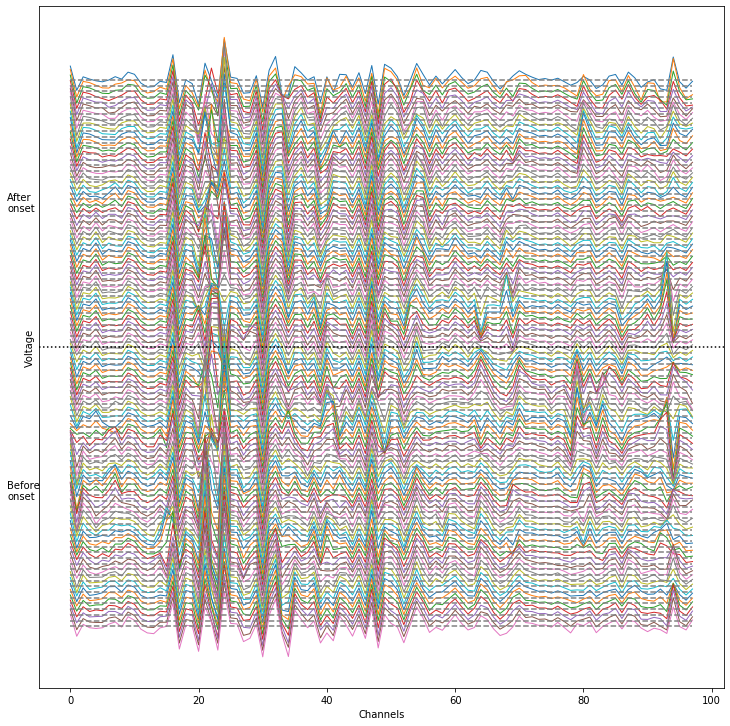

In [312]:
transposed_data = downsample(P2[P2_START-1000:P2_START+1000], new_freq=50)

(fig, ax) = eeg_plot(transposed_data, 100, normalise=False, fig_name="P2_transposed_downsampled");
ax.set(xlabel="Channels");
ax.axhline((transposed_data.shape[0]*100//2), linestyle="dotted", c="black")
fig.text(-0.01,0.3,s="Before\nonset")
fig.text(-0.01, 0.7, s="After\nonset");

__Figure 8:__ Transposed iEEG after downsampling to a sampling rate of 50Hz.

The image produced represents a period 20 times longer than Figure 7, showing changes ~2 seconds before and after clinicial onset. 

The new perspective produces different patterns than the 'normal' EEG/iEEG. There are clearly defined peaks and areas of irregularity. When the pre-seizure and seizure periods were compared, contrary to what one would intuitively expect, the seizure segments is more organised and synchronous. This actually reflects one hallmark of an epileptic seizure, the hypersynchronous activity, which is a feature not as clearly displayed in a normal iEEG. 

### Training Data Dictionaries

In [106]:
P1_labels = P1_edf.getSignalLabels()

P1_X = {}
for index, val in enumerate(P1_labels):
    key = re.search(r"\b[A-Z][0-9]{1,2}", P1_labels[index])
    P1_X[key[0]] = P1[:, index]
    
P1_y = {}
for key in P1_X:
    P1_y[key] = zeros(P1_X[key].shape[0])

In [107]:
P2_labels = P2_edf.getSignalLabels()

P2_X = {}
for index, val in enumerate(P2_labels):
    key = re.search(r"\b[A-Z][0-9]{1,2}", P2_labels[index])
    P2_X[key[0]] = P2[:, index]
    
P2_y = {}
for key in P2_X:
    P2_y[key] = zeros(P2_X[key].shape[0])

### Labelling Training Data

In [108]:
def label_seizure_channels(dictionary_labels, letter, start, stop, channel_numbers=None):
    
    # add dictionary of labels set to zero
    # letter of channels you want to set as seizure channels
    # start and stop times of the seizure
    # optionally, add the specific channel numbers
    
    import re
    
    if channel_numbers == None:
        for key in dictionary_labels:
            if re.search(letter, key):
                dictionary_labels[key][start:stop] = 1
    else:
        for channel_number in channel_numbers:
            channel_number = str(channel_number)
            for key in dictionary_labels:
                if re.search(letter+channel_number, key):
                    dictionary_labels[key][start:stop] = 1

In [109]:
label_seizure_channels(P1_y, 'C', 700, 81000)
label_seizure_channels(P1_y, 'D', 11100, 81000)
label_seizure_channels(P1_y, 'F', 11125, 81000)
label_seizure_channels(P1_y, 'H', 10200, 81000)
label_seizure_channels(P1_y, 'K', 12000, 81000)
label_seizure_channels(P1_y, 'G', 12000, 81000)
label_seizure_channels(P1_y, 'E', 18000, 81000, channel_numbers=[7,6,5,4])
label_seizure_channels(P1_y, 'E', 10800, 81000, channel_numbers=[8,3,2])

In [110]:
label_seizure_channels(P2_y, 'C', P2_START, P2_END)
label_seizure_channels(P2_y, 'E', 149264, 233352)
label_seizure_channels(P2_y, 'F', 149264, 228352)
label_seizure_channels(P2_y, 'D', 149264, 228352)
label_seizure_channels(P2_y, 'J', 160264, 198264)
label_seizure_channels(P2_y, 'H', 149264, 198352)
label_seizure_channels(P2_y, 'L', 144264, 228352, channel_numbers=[7,6,5,4,3,2])
label_seizure_channels(P2_y, 'G', 148764, 195352)
label_seizure_channels(P2_y, 'K', 149264, 228352, channel_numbers=[4,3,2])
label_seizure_channels(P2_y, 'K', 149264, 198352, channel_numbers=[18,17,16,15])

## Predictions

To use the transposed data, the number of samples – the number of features – must be conserved for the training and testing data. To address this, five-second periods were selected and resampling frequency set to 50Hz.

In [353]:
L_seg = 5*1024
freq = 50

In [141]:
# P1
segments = arange(P1_START, P1_END, step=L_seg)

clf_transposed_data = RandomForestClassifier(random_state=RANDOM_SEED) # creating a new classifier

X1 = []
y1 = []
y1_1 = []

for i in range(0,len(segments)-1):
    X1.append(downsample(P1[segments[i]:segments[i+1],:], new_freq=freq))
    
    for key in P1_y:
        y1_1.append(P1_y[key][segments[i+1]])
    y1.append(y1_1)
    y1_1 = []

# ----- predictions --------

for i in range(len(X1)):
    clf_transposed_data.fit(X1[i], y1[i])
    
test_segments = arange(0,200000, step=L_seg)
predictions_transposed = []

for i in range(len(test_segments)-1):
    X_testing = downsample(P2[test_segments[i]:test_segments[i+1],:], new_freq=freq)
    predictions_transposed.append(clf_transposed_data.predict_proba(X_testing).T[0])
    

In [357]:
segments = arange(P2_START, P2_END, step=L_seg)

clf_transposed2 = RandomForestClassifier(random_state=RANDOM_SEED)

X1 = []
y1 = []
y1_1 = []

for i in range(0,len(segments)-1):
    X1.append(downsample(P2[segments[i]:segments[i+1],:], new_freq=freq))
    
    for key in P2_y:
        y1_1.append(P2_y[key][segments[i+1]])
    y1.append(y1_1)
    y1_1 = []
    
# ----- predictions --------

for i in range(len(X1)):
    clf_transposed2.fit(X1[i], y1[i])
    
test_segments = arange(0,200000, step=L_seg)
predictions_transposed2 = []

for i in range(len(test_segments)-1):
    X_testing = downsample(P2[test_segments[i]:test_segments[i+1],:], new_freq=freq)
    predictions_transposed2.append(clf_transposed2.predict_proba(X_testing).T[0])

# Results

To use machine learning to determine seizure onset, one segments determined as seizure and non-seizure were used for training. Prediction probabilities for each time point in the test segment were obtained and compared to the clinically determined seizure onset.


## Onset Time Predictions

### Comparison of Different of Features

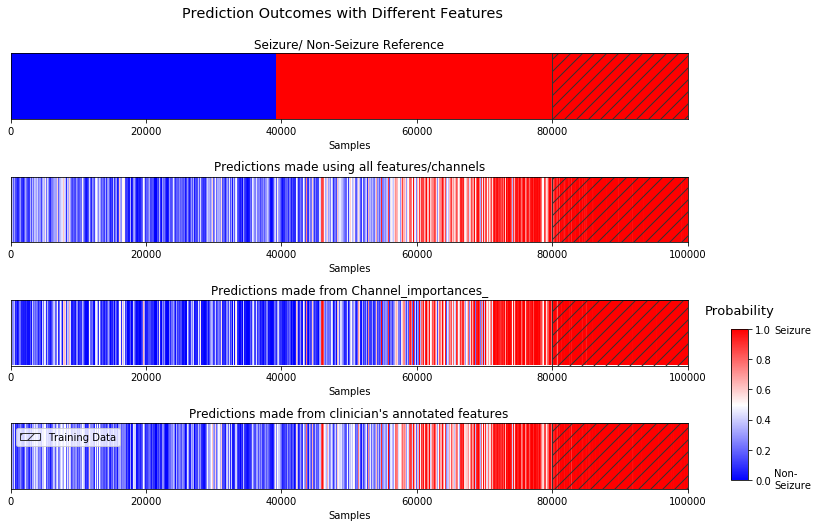

In [71]:
title = "Prediction Outcomes with Different Features"

fig, ax = subplots(4, figsize=(12,7))

ax[0].imshow(P2_REFERENCE[:,100000:200000], aspect="auto", cmap="bwr")
ax[0].set(title="Seizure/ Non-Seizure Reference")

ax[1].imshow(predictions.T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
ax[1].set(title="Predictions made using all features/channels")

ax[2].imshow(predictions_classifier_importances.T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
ax[2].set(title="Predictions made from Channel_importances_")

ax[3].imshow(predictions_clinician_importances.T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
ax[3].set(title="Predictions made from clinician's annotated features")

for axi in ax.ravel():
    axi.set(xlabel="Samples")
    axi.set_yticks([],[]) 
    axi.axvspan(80000, 100000, edgecolor="#333333", hatch="//", fill=False, label="Training Data")

axi.legend()  

fig.suptitle(t=title, y=1.04, x=0.4, fontsize="x-large");
fig.tight_layout()
add_legend(fig)

fig.savefig(f"figures/{title}.png")

__Figure 9:__ The effect of varying training features on classifier predictions.

When comparing the prediction outcomes to the reference state, all classifiers were delayed in predicting onset when observing the polar state predictions. However, it can be interpreted that the classifier predictions show a gradual transition from non-seizure to seizure states, potentially indicating spread to more channels.

When comparing the classifier with the clinical determined significant channels and all channels models, visually, there was no substantial difference, indicating that the algorithm picked up data features which are of clinical relevance.


### Comparison of Training Data 

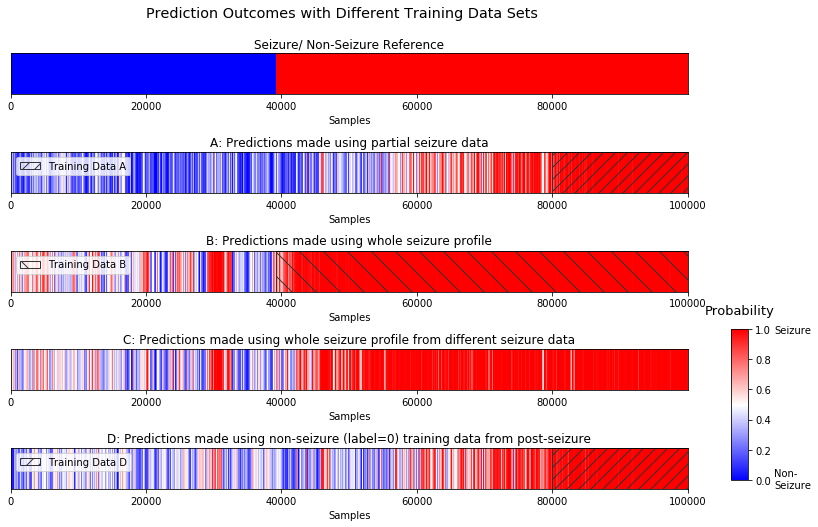

In [404]:
title = "Prediction Outcomes with Different Training Data Sets"

fig, ax = subplots(5, figsize=(12,7))

ax[0].imshow(P2_REFERENCE[:,100000:200000], aspect="auto", cmap="bwr")
ax[0].set(title="Seizure/ Non-Seizure Reference")

ax[1].imshow(predictions.T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
ax[1].set(title="A: Predictions made using partial seizure data")
ax[1].axvspan(80000, 100000, edgecolor="#333333", hatch="//", fill=False, label="Training Data A")
ax[1].legend()

ax[2].imshow(predictions_longer_data.T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
ax[2].set(title="B: Predictions made using whole seizure profile")
ax[2].axvspan(P2_START-100000, 100000, edgecolor="#333333", hatch="\\", fill=False, label="Training Data B")
ax[2].legend()

ax[3].imshow(predictions_different_data.T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
ax[3].set(title="C: Predictions made using whole seizure profile from different seizure data")

ax[4].imshow(predictions_post_ictal_data.T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
ax[4].set(title="D: Predictions made using non-seizure (label=0) training data from post-seizure")
ax[4].axvspan(80000, 100000, edgecolor="#333333", hatch="//", fill=False, label="Training Data D")
ax[4].legend()

for axi in ax.ravel():
    axi.set(xlabel="Samples")
    axi.set_yticks([],[]) 
    
fig.suptitle(t=title, y=1.04, x=0.4, fontsize="x-large");
fig.tight_layout()
add_legend(fig)

fig.savefig(f"figures/{title}.png")

__Figure 10:__ The seizure probabilities obtained when different segments of the iEEG were used for training.

There is a significant difference in classifier outcomes when using more extended training data – specifically, increasing the length of seizure data trained on – as seen in figures A and B. 

Increasing the training data size resulted in more seizure-like activity prior to the clinician determined onset. 

Classifier training was repeated on the full seizure dynamics from the other patient seizure data, P1, to assess reproducibility. Figures B and C show significant similarity, with similar onset prediction times and common seizure-like activity identified before onset.

Comparing the predictions A & D illustrate the effect of different “non-seizure” training data (where labels = 0) on classifier outcomes. In predictions D, non-seizure training data had a great temporal separation from the seizure training data, therefore was less likely to contain epileptic activity or represent a state of high seizure propensity. 

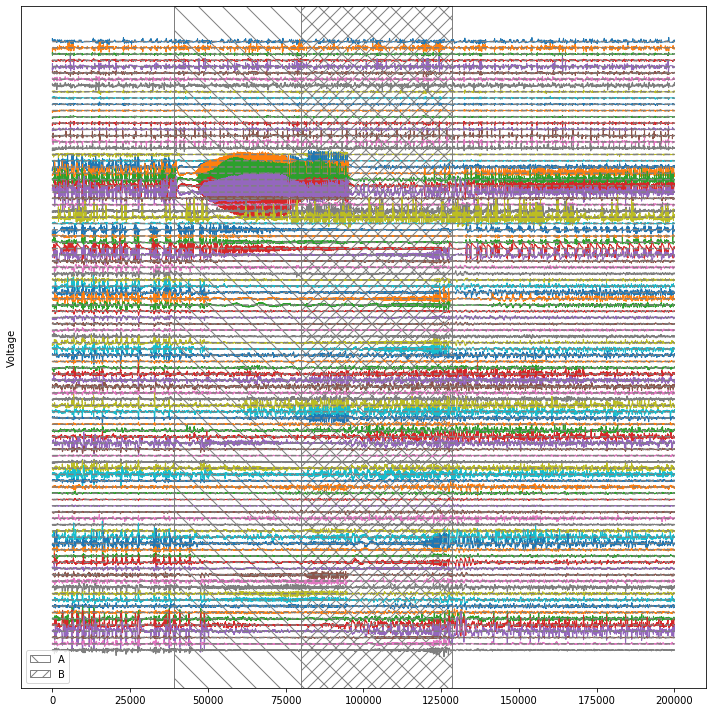

In [51]:
(fig, ax) = eeg_plot(filter_data(P2[100000:300000,:]),500,normalise=False, fig_name="Training_sets_visualisation");

ax.axvspan(P2_START-100000, P2_END-100000, hatch="\\", label="A", fill=False, edgecolor="grey")
ax.axvspan(80000,P2_END-100000, hatch="//", label="B", fill=False, edgecolor="grey")
ax.legend();

__Figure 11:__ Visual representation of the different seizure-identified training data (label = 1) in Figures 10A and 10B.

### Effect of Filtering


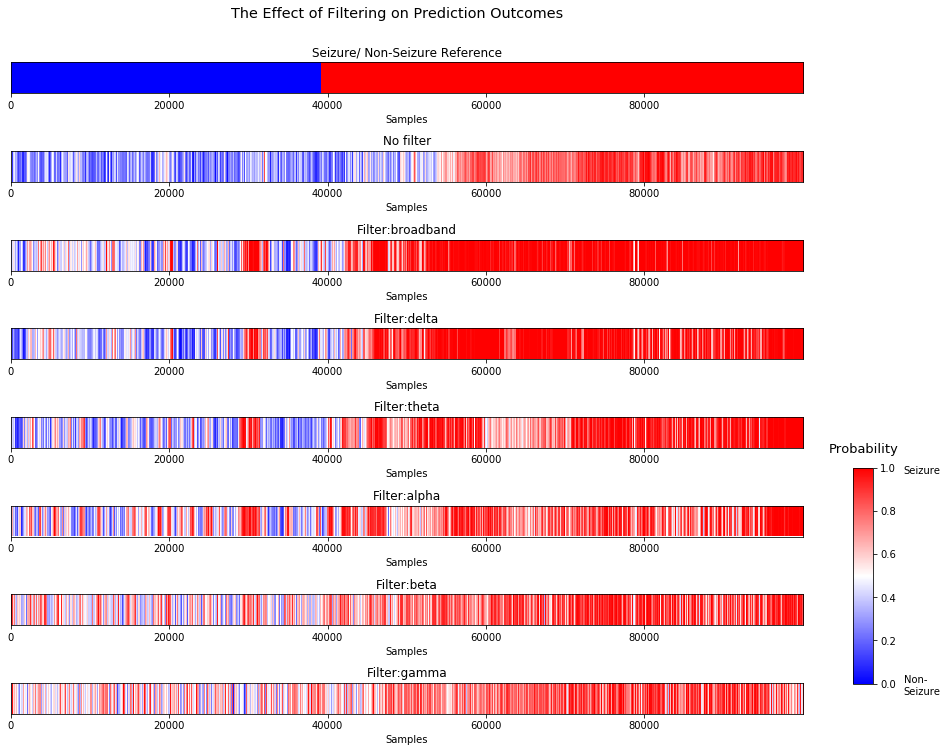

In [346]:
title = "The Effect of Filtering on Prediction Outcomes "

fig, ax = subplots(len(frequencies)+2, figsize=(14,10))

ax[0].imshow(P2_REFERENCE[:,100000:200000], aspect="auto", cmap="bwr")
ax[0].set(title="Seizure/ Non-Seizure Reference")

ax[1].imshow(predictions_without_filter.T[0].reshape(1,-1), aspect="auto",cmap="bwr_r")
ax[1].set(title="No filter")

for i, predict in enumerate(predictions_filtering):
    
    ax[i+2].imshow(predictions_filtering[i].T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
    ax[i+2].set(title=f"Filter:{frequencies[i]}")

for axi in ax.ravel():
    axi.set(xlabel="Samples")
    axi.set_yticks([],[]) 
     

fig.suptitle(t=title, y=1.04, x=0.4, fontsize="x-large");
fig.tight_layout()
add_legend(fig)

fig.savefig(f"figures/{title}.png")

__Figure 12:__ The classifier prediction outcomes on the same training and testing datasets under different filter settings.

Next the effect of filtering (broadband EEG or individual frequency bands) on the outcome of seizure propabilities was determined. The segments used for training were the same.

From figure 12, the broadband, delta, theta and alpha filters are the best for producing a seizure onset time closest to the reference. This shows that the removal of low frequency drifts lead to an earlier prediction of seizure onset that matches the clinical onset.

Beta and gamma filters detected no apparent transition between states in the testing data, detecting a substantial seizure-like activity throughout the test. Without a filter, the classifier will detect the least amount of epileptic-like activity and predict onset the latest.

### Comparison of Classifiers

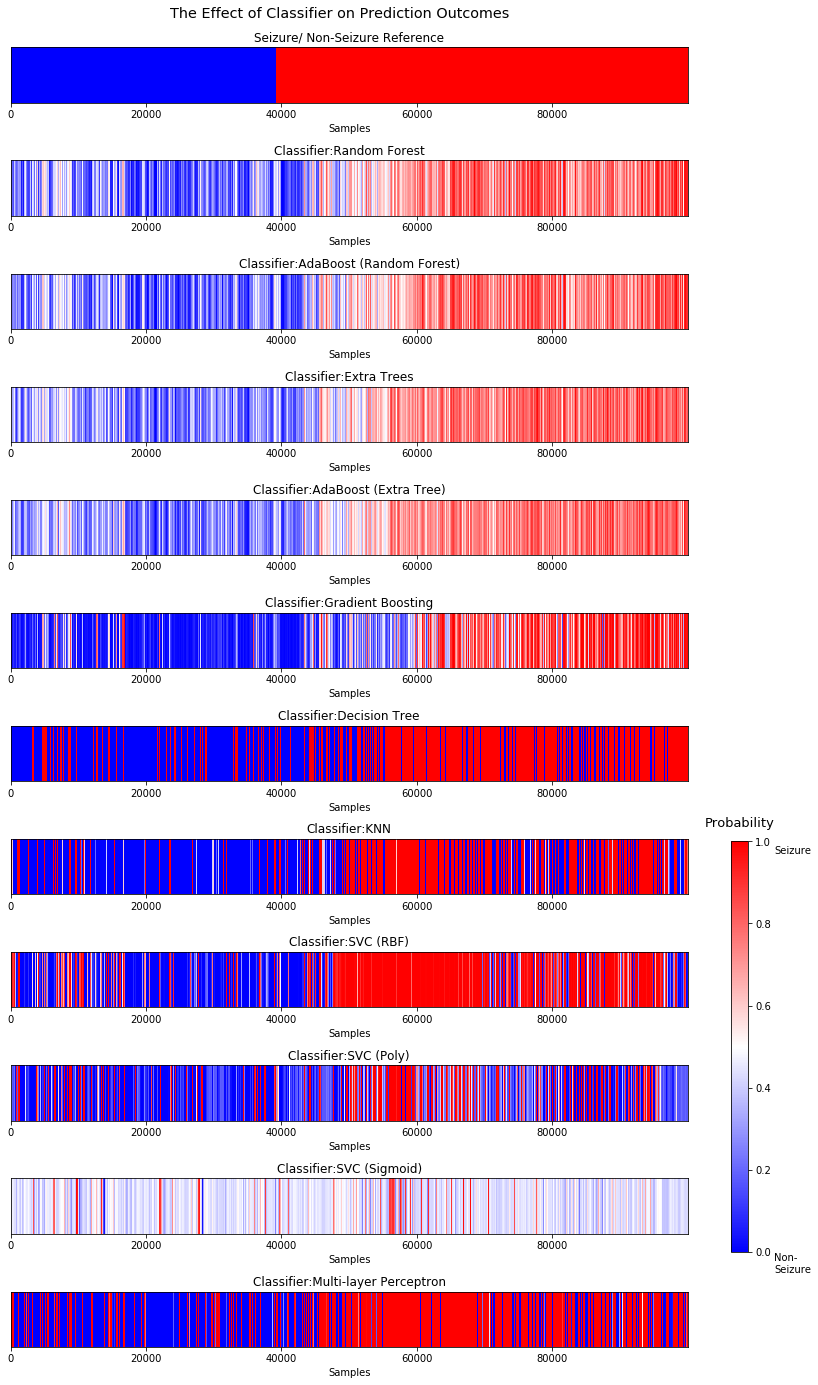

In [93]:
title = "The Effect of Classifier on Prediction Outcomes "

keys = list(classifiers.keys())

fig, ax = subplots(len(keys)+1, figsize=(12,19))

ax[0].imshow(P2_REFERENCE[:,100000:200000], aspect="auto", cmap="bwr")
ax[0].set(title="Seizure/ Non-Seizure Reference")

for i, predict in enumerate(predictions_classifiers):
    ax[i+1].imshow(predictions_classifiers[i].T[0].reshape(1,-1), aspect="auto", cmap="bwr_r")
    ax[i+1].set(title=f"Classifier:{keys[i]}")

for axi in ax.ravel():
    axi.set(xlabel="Samples")
    axi.set_yticks([],[]) 

fig.suptitle(t=title, y=1.01, x=0.4, fontsize="x-large");
fig.tight_layout()
add_legend(fig)

fig.savefig(f"figures/{title}.png")

__Figure 13:__ A comparison of predictions made using different classifiers, but same training and testing data.

In this work we focussed on the use of a specific ensemble method for classification. However, scikit-learn offers a large number of established classifiers working with different optimisation strategies.

In Figure 13, the predictions of a number of different classifiers are shown.

* Extra Tree is another ensemble method, similar to Random Forest.
* Adaboost is not a classifier but an optimisation technique to improve the outcome of ensemble methods.
* kNN: k nearest neighbours
* SVC: support vector classification
* the multilayer perceptron is a classical artificial neural network, which aims to crudely model how the biological brain learns

## Channel Onset Predictions

### During Seizure 

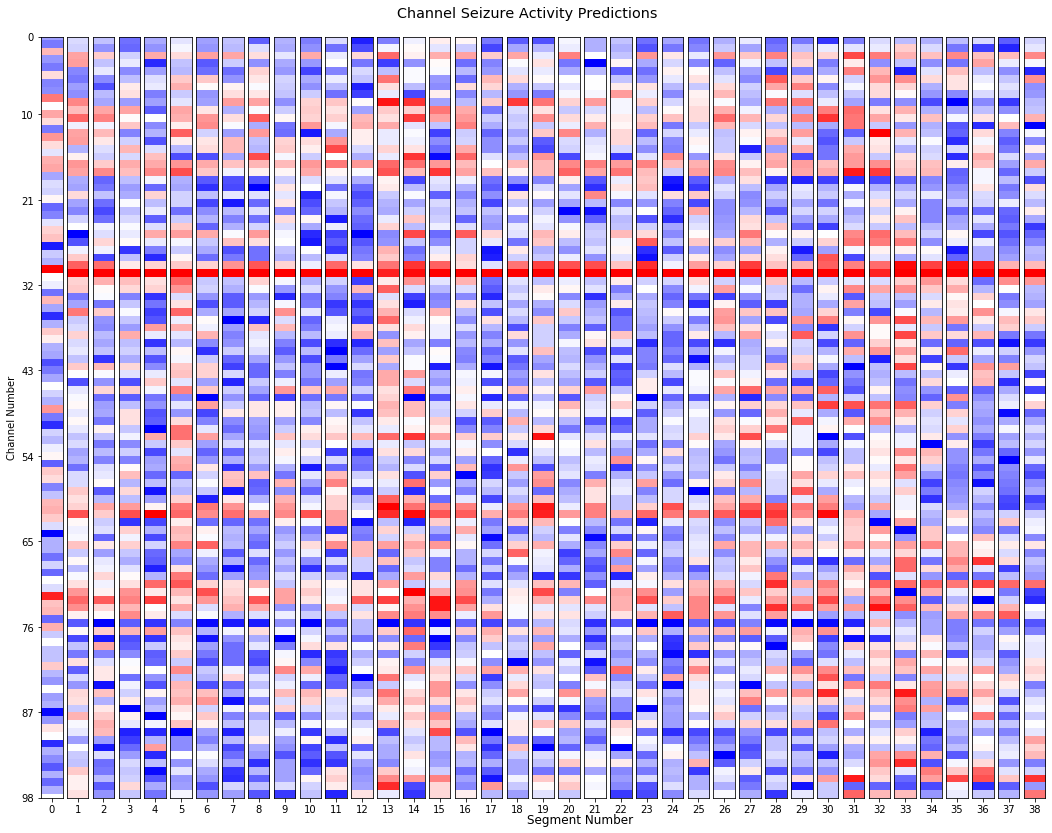

In [225]:
title = "Channel Seizure Activity Predictions"
fig, ax = subplots(ncols=len(predictions_transposed), figsize=(18,14))

for i, predict in enumerate(predictions_transposed):
    ax[i].imshow(predict.reshape(-1,1), aspect="auto", cmap="bwr_r")
    ax[i].set_xticks([0])
    ax[i].set_xticklabels([i])
    ax[i].set_yticks([])
    
ax[0].set_yticks(np.linspace(0,98,10,dtype=int))
ax[0].set(ylabel="Channel Number")
fig.text(s="Segment Number", x=0.5,y=0.1, fontsize="large")
fig.suptitle(t=title, y=0.91, fontsize="x-large");
fig.savefig(f"figures/{title}.png")

__Figure 14:__ Channel onset predictions for seizure-like activity. Each segment represents a 5 second long band downsampled to a sampling rate of 50Hz.

We now use the transposed data to automatically determine seizure onset channels.

In Figure 14, the classifier identified horizontal strips of consistent epileptic-like activity, especially within channel number 29-30.  Similar strips were found at channels 60-63 and 72-74, which were consistent with leads found within the classifier-identified important channels and clinician-determined important channels. From segment 13, seizure-like activity appears to spread and dissipate vertically. Again at segment 25, the seizure predictability appears to propagate to surrounding channels to a greater extent and longer duration.

In comparison to the iEEG of the testing data, areas of epileptic activity are more clearly visible and widespread. This is not as easy to interpret from the iEEG data, especially within channels in which seizure activity does not produce high-amplitude waves.


### Prior to Seizure Onset

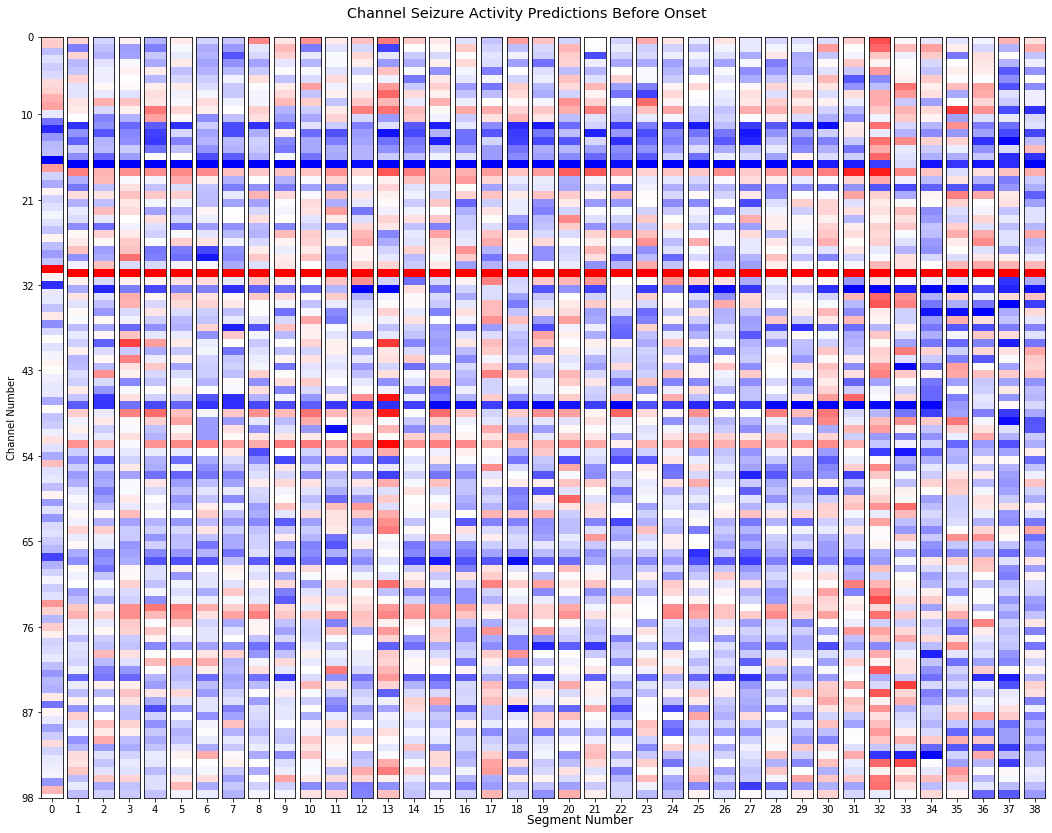

In [358]:
title = "Channel Seizure Activity Predictions Before Onset"
fig, ax = subplots(ncols=len(predictions_transposed2), figsize=(18,14))

for i, predict in enumerate(predictions_transposed2):
    ax[i].imshow(predict.reshape(-1,1), aspect="auto", cmap="bwr_r")
    ax[i].set_xticks([0])
    ax[i].set_xticklabels([i])
    ax[i].set_yticks([])
    
ax[0].set_yticks(np.linspace(0,98,10,dtype=int))
ax[0].set(ylabel="Channel Number")
fig.text(s="Segment Number", x=0.5,y=0.1, fontsize="large")
fig.suptitle(t=title, y=0.91, fontsize="x-large");
fig.savefig(f"figures/{title}.png")

__Figure 15:__ Classifier predicted iEEG channels showing seizure-like activity.

The figure shows that the classifier has identified epileptic like-activity in certain channels prior to the clinicain determined seizure onset. 

At segment 32, there is significant epileptic-like activity detected throughout the majority of the channels which dissipates in the following segments. 

Horizontal strips of increased epileptic-like activity are also present, similar to figure 14. Likewise, channel 29 shows consistent abnormal activity throughout all segments. 

Channels 10-16 show consistent non-seizure like activity, up until segment 32.

The results of the machine learning can thus be used to identify local EEG abnormalities.

# Discussion

__There is a gradual transition from non-seizure to seizure states.__

Except for the Support Vector Classifier (Radial Basis Function), all models showed that the transition from non-seizure to seizure states follow a gradual transition. It can be inferred that onset does not occur as suddenly as the reference image implies. This gradual transition theory is supported by the existence of auras: an ictal phenomenon such as visual, somatosensory or auditory disturbances, which precede seizure onset. 

From the channel prediction graphs, it illustrates that seizure-like activity occurs prior to clinically determined onset without resulting in the clinical presentation. From this, we can infer the abnormal activity has not reached the threshold to disrupt brain function yet or the abnormal activity is only affecting brain regions that do not lead to a detectable change in function.

__Epileptic patients fluctuate between seizure propensity states.__

Additionally, the fact that the majority of models detected epileptic-like activity prior to the clinically determined onset could be indicative of the presence of seizure propensity states. As mentioned previously, seizure states may not be binary – instead, the brain state fluctuates towards increased seizure tendency, supporting Bragin’s hypothesis. Deviations away from inter-ictal states could be the result of microseizures amalgamating to the point of brain activity disturbance, but below a threshold in which a seizure would be induced. The existence of auras also supports this. The aura may be the consequence of the transition to a state of higher seizure risk; electrophysiologically, microseizures are disrupting brain activity but below a level to be visually detectable on an EEG too. Not all auras precede a seizure – thus emphasises state changes reflect increased likelihood. 

It is known that some environmental factors result in increased seizure probability, rather than directly resulting in a seizure, further supporting the probabilistic state hypothesis. These triggers include sleep deprivation, fever, stress or certain drugs (Louis and Frey, 2016). 

The channel prediction graphs, specifically figure 15, provides evidence to support the seizure propensity states. Within the figure, blocks of seizure-like activity fluctuate but do not result in the clinical presentation. 

__Clinician versus classifier__

Using classifiers for seizure prediction is advantageous over visual inspection alone due to the higher sensitivity for seizure-activity detection. Within iEEG data, some channels may be overlooked, potentially demonstrated by the difference between classifier-identified important channels and clinician-determined important channels. However, the significance of this difference can be argued, as shown in figure X, a classifier trained on the different features will still produce very similar predictions. 

We can confirm classifiers improve with larger training datasets. A potential advantage of using classifiers for seizure prediction is that classifiers can look at larger sets of data and potentially spot trends a clinician might overlook. However, the opposite can be argued. If the classifier is trained incorrect, it may lead to wrong predictions.


## Limitations

It is imperative to recognise the limitations, along with the capabilities of these models. Accuracy of the models is determined the ability to reproduce the onset time stated in the EDF annotations. If seizure onsets follow a gradual transition between states, it is uncertain that the labelled onset is correct. Furthermore, it is assumed that the better model would have polarising predictions and clear transitions between states, but this might not reflect the true behaviour of the brain. From Marc et al., microseizures occur frequently, and so more chaotic model predictions may be more accurate. 

Undeniably, there may be limitations within the classifier itself. With machine learning, issues with overfitting can impact the model’s accuracy. However, with more enormous datasets, substantial computing power is required. 

Similarly, due to restrictions in the amount of data available, the temporal distance from the seizure onset was limited. Consequently, a slight, residual, epileptiform activity might impact the model outcomes, as mentioned when observing pre- and post-seizure trained data.

Further limitations originate from the data itself. Microseizures are undetectable by the electrodes used in the recordings, and so their activity is assumed. We cannot confirm deviations to epileptic activity is the result of amalgamations of microseizures or faults of the classifiers. The restricted number of iEEGs accessible curbs improvements to the robustness of the model. 

Our project used only iEEG data, however within the clinic there are many more types of data available, such as seizure video, structural anf functional MRI.

## Further Investigations

Potential further investigations are numerous, however ones of particular interest include investigations of iEEG data during auras that do not result in seizures. From this, we could observe transitions between probabilistic states with patient observations to confirm a patient has entered a different state. This could be then compared to the iEEG prior to a seizure. Through understanding these probability states, these could provide a gateway to seizure prediction and prevention clinically and pharmacologically. 

Investigations using microelectrodes to detect the presence of microseizures may provide more conclusive evidence. Additionally, microelectrode recordings of patients exposed to known seizure triggers, such as tiredness, when compared to a non-drowsy state may show the heightened seizure propensity state.

An additional improvement to these models would be the expansion of classifier training on more extensive datasets, from different seizures, patients and even non-epileptic individuals.

## Concluding statement

Due to the limitiations, additional evidence is needed before drawing conclusions. Evidence from more iEEG recordings, different data types, or genetic testing.

Nevertheless, it cannot be argued that machine learning would have a significant therapeutic impact on epilepsy diagnosis and subsequent treatment. With advancing technologies, machine learning would allow for more streamlined identifcation of seizure behaviour, the easier interpretation of EEG recordings and ultimately better patient outcomes. 


# References

Anon (n.d.) A Brief Introduction to Supervised Learning - Towards Data Science [online]. Available from: [towardsdatascience.com](https://towardsdatascience.com/a-brief-introduction-to-supervised-learning-54a3e3932590) (Accessed 8 April 2020).

Anon (n.d.) Epilepsy [online]. Available from: [who.int](https://www.who.int/news-room/fact-sheets/detail/epilepsy) (Accessed 8 April 2020).

Anon (2011) Epilepsy prevalence, incidence and other statistics Joint Epilepsy Council of the UK and Ireland. Available from: [epilepsyscotland.org.uk](https://www.epilepsyscotland.org.uk/wp-content/uploads/2019/05/Joint_Epilepsy_Council_Prevalence_and_Incidence_September_11_3.pdf) 

Anon (n.d.) How epilepsy is diagnosed | Epilepsy Society [online]. Available from: [epilepsysociety.org.uk](https://www.epilepsysociety.org.uk/how-epilepsy-diagnosed) (Accessed 8 April 2020).

Anon (n.d.) Normal Sleep EEG: Overview, Stage I Sleep, Stage II Sleep [online]. Available from: [emedicine.medscape.com](https://emedicine.medscape.com/article/1140322-overview#a1) (Accessed 5 April 2020).

Anon (n.d.) Seizure triggers | Epilepsy Action [online]. Available from: [epilepsy.org](https://www.epilepsy.org.uk/info/triggers) (Accessed 27 March 2020).

Bromfield, E. B. et al. (2006) [Basic Mechanisms Underlying Seizures and Epilepsy](https://www.ncbi.nlm.nih.gov/books/NBK2510/).

Dichter, M. A. (2009) [Emerging Concepts in the Pathogenesis of Epilepsy and Epileptogenesis](https://jamanetwork.com/journals/jamaneurology/fullarticle/796766). Archives of Neurology 66 (4) p.443–447.

Engel, J. et al. (2013) [Epilepsy biomarkers](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4131763/). Epilepsia. [Online] 54 (SUPPL.4), 61–69.

Kumar, J. S. & Bhuvaneswari, P. (2012) [Analysis of electroencephalography (EEG) signals and its categorization - A study](https://www.sciencedirect.com/science/article/pii/S1877705812022114). [Online]. 1 January 2012 Elsevier Ltd. pp. 2525–2536.

Kuruvilla, A. & Flink, R. (2003) [Intraoperative electrocorticography in epilepsy surgery: Useful or not?](https://www.ncbi.nlm.nih.gov/pubmed/14630497) Seizure. [Online] 12 (8), 577–584.

Louis, E. K. S. & Frey, L. C. (2016) [Electroencephaolgraphy - An introductory text.](https://www.ncbi.nlm.nih.gov/books/NBK390354/) American Epilepsy Society.

Perucca, P. et al. (2014) Intracranial electroencephalographic seizure-onset patterns: effect of underlying pathology. Brain : a journal of neurology. [Online] 137 (Pt 1), 183–196. [online]. Available from: [ncbi.nlm.gov](http://www.ncbi.nlm.nih.gov/pubmed/24176980) (Accessed 3 April 2020).

Tsipouras, M. G. (2019) [Spectral information of EEG signals with respect to epilepsy classification.](https://link.springer.com/article/10.1186/s13634-019-0606-8) Eurasip Journal on Advances in Signal Processing. [Online] 2019 (1), 1–17.
 
